In [31]:
%run VBM_breakage.ipynb

In [8]:
df = pd.read_csv('particle_size.csv')
data = df.to_numpy()
L = data[:,0]
V = data[:,1:]/100
V0 = V[:,0]

In [45]:
T = np.array([0,0.9,3.5,13.4,100])
S = dsf(0.01,L,3)
def uniformb(x,y):
    return 1/y
def selection(x):
    return 0.01*x**3
b_uni = vdbf2(uniformb,L)

In [26]:
m0 = np.sum(V0)
Y0=np.append(V0,m0)

In [28]:
def dydx(t,y):
    return breakage(y,b_uni,S)

sol = solve_ivp(dydx,[T[0],T[-1]],Y0,method='Radau',t_eval=T)

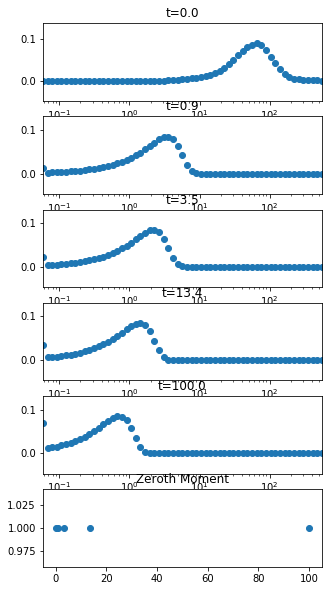

In [29]:
V = sol.y[0:-1,:]
M = sol.y[-1:,:]

rows = len(T)
plt.close('all')
fig, axes = plt.subplots(rows+1,1,figsize=(5,10))
for i in range(rows):
    axes[i].scatter(L,V[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([L[0],L[-1]])
    axes[i].title.set_text('t={0}'.format(T[i]))
axes[rows].scatter(T,M[0,:])
axes[rows].title.set_text('Zeroth Moment')

In [30]:
M

array([[1.0000003, 1.0000003, 1.0000003, 1.0000003, 1.0000003]])

In [32]:
lgv = 10.0
sg = 4.0
n=10
l = L[n]
def integrand(x):
    return lognorm_b(x,l,lgv,sg)    
den,err = quad(integrand,0,l)

print(den)

1.000000000159627


In [34]:
def logb(x,y):
    return lognorm_b(x,y,lgv,sg)

In [35]:
b_logn = vdbf2(logb,L)

In [46]:
b_logn2 = vdbf(logb,selection,L)

In [52]:
b_logn[:,50]

array([1.06515458e-04, 5.78190966e-05, 8.52632042e-05, 1.24684253e-04,
       1.81485971e-04, 2.60009848e-04, 3.67772743e-04, 5.16775921e-04,
       7.12462383e-04, 9.72186187e-04, 1.31215277e-03, 1.74582893e-03,
       2.30341477e-03, 2.99582263e-03, 3.84350957e-03, 4.88990746e-03,
       6.12982085e-03, 7.59112682e-03, 9.30486617e-03, 1.12409738e-02,
       1.34430195e-02, 1.58726635e-02, 1.85020642e-02, 2.13299751e-02,
       2.42782420e-02, 2.73072238e-02, 3.03451501e-02, 3.33057840e-02,
       3.61220860e-02, 3.87054709e-02, 4.09699054e-02, 4.28477657e-02,
       4.42656593e-02, 4.51857092e-02, 4.55689991e-02, 4.53962761e-02,
       4.46843930e-02, 4.34515633e-02, 4.17443624e-02, 3.96195692e-02,
       3.71506271e-02, 3.44155434e-02, 3.14974926e-02, 2.84800100e-02,
       2.54410722e-02, 2.24523633e-02, 1.95759877e-02, 1.68625596e-02,
       1.43499710e-02, 1.20648385e-02, 1.00212542e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [53]:
b_logn2[:,50]

array([1.06981143e-04, 5.80718811e-05, 8.56359741e-05, 1.25229371e-04,
       1.82279426e-04, 2.61146609e-04, 3.69380642e-04, 5.19035260e-04,
       7.15577262e-04, 9.76436577e-04, 1.31788949e-03, 1.75346168e-03,
       2.31348528e-03, 3.00892034e-03, 3.86031336e-03, 4.91128609e-03,
       6.15662038e-03, 7.62431516e-03, 9.34554697e-03, 1.12901192e-02,
       1.35017922e-02, 1.59420586e-02, 1.85829550e-02, 2.14232296e-02,
       2.43843863e-02, 2.74266108e-02, 3.04778188e-02, 3.34513966e-02,
       3.62800114e-02, 3.88746909e-02, 4.11490255e-02, 4.30350957e-02,
       4.44591884e-02, 4.53832607e-02, 4.57682264e-02, 4.55947482e-02,
       4.48797528e-02, 4.36415332e-02, 4.19268683e-02, 3.97927856e-02,
       3.73130493e-02, 3.45660078e-02, 3.16351993e-02, 2.86045243e-02,
       2.55523004e-02, 2.25505248e-02, 1.96615737e-02, 1.69362825e-02,
       1.44127090e-02, 1.21175859e-02, 5.69307576e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [347]:
b_uni[:,40]

array([1.35716333e-04, 7.36700182e-05, 1.08637841e-04, 1.58866045e-04,
       2.31239773e-04, 3.31290722e-04, 4.68596471e-04, 6.58448398e-04,
       9.07781681e-04, 1.23870794e-03, 1.67187528e-03, 2.22444238e-03,
       2.93488861e-03, 3.81711788e-03, 4.89719550e-03, 6.23046005e-03,
       7.81029176e-03, 9.67221011e-03, 1.18557657e-02, 1.43226510e-02,
       1.71283805e-02, 2.02241038e-02, 2.35743462e-02, 2.71775200e-02,
       3.09340449e-02, 3.47934125e-02, 3.86641765e-02, 4.24364589e-02,
       4.60248410e-02, 4.93164528e-02, 5.22016748e-02, 5.45943445e-02,
       5.64009491e-02, 5.75732278e-02, 5.80615954e-02, 5.78415209e-02,
       5.69344774e-02, 5.53636713e-02, 5.31884466e-02, 5.04811481e-02,
       4.73353534e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
rate = breakage(Y0,b_logn,S)

In [340]:
i = 35
j = 50
b_logn[i][j]*S[j]*V0[j]-S[i]*V0[i]

34.52288765108219

In [57]:
rate

array([ 1.76641086e+00,  9.58849370e-01,  1.41397176e+00,  2.06771507e+00,
        3.00969263e+00,  4.31190201e+00,  6.09899987e+00,  8.57001052e+00,
        1.18151986e+01,  1.61223569e+01,  2.17602302e+01,  2.89521465e+01,
        3.81989325e+01,  4.96815543e+01,  6.37392636e+01,  8.10923175e+01,
        1.01654557e+02,  1.25888283e+02,  1.54308266e+02,  1.86415915e+02,
        2.22933775e+02,  2.63226033e+02,  3.06830969e+02,  3.53727906e+02,
        4.02620746e+02,  4.52852060e+02,  5.03231557e+02,  5.52328950e+02,
        5.99032142e+02,  6.41871424e+02,  6.79418884e+02,  7.10550987e+02,
        7.34046820e+02,  7.49271237e+02,  7.55565362e+02,  7.52582125e+02,
        7.40542720e+02,  7.19626950e+02,  6.90354825e+02,  6.53170983e+02,
        6.08351444e+02,  5.55504494e+02,  4.93213660e+02,  4.18585721e+02,
        3.26893737e+02,  2.10912515e+02,  5.82815437e+01, -1.16635636e+02,
       -2.99752282e+02, -4.76115125e+02, -6.22054694e+02, -7.10905361e+02,
       -7.23315112e+02, -

In [342]:
dydt2 = breakage(Y0,b_uni,S)

In [343]:
dydt2

array([ 1.76641086e+00,  9.58849370e-01,  1.41397176e+00,  2.06771507e+00,
        3.00969263e+00,  4.31190201e+00,  6.09899987e+00,  8.57001052e+00,
        1.18151986e+01,  1.61223569e+01,  2.17602302e+01,  2.89521465e+01,
        3.81989325e+01,  4.96815543e+01,  6.37392636e+01,  8.10923175e+01,
        1.01654557e+02,  1.25888283e+02,  1.54308266e+02,  1.86415915e+02,
        2.22933775e+02,  2.63226033e+02,  3.06830969e+02,  3.53727906e+02,
        4.02620746e+02,  4.52852060e+02,  5.03231557e+02,  5.52328950e+02,
        5.99032142e+02,  6.41871424e+02,  6.79418884e+02,  7.10550987e+02,
        7.34046820e+02,  7.49271237e+02,  7.55565362e+02,  7.52582125e+02,
        7.40542720e+02,  7.19626950e+02,  6.90354825e+02,  6.53170983e+02,
        6.08351444e+02,  5.55504494e+02,  4.93213660e+02,  4.18585721e+02,
        3.26893737e+02,  2.10912515e+02,  5.82815437e+01, -1.16635636e+02,
       -2.99752282e+02, -4.76115125e+02, -6.22054694e+02, -7.10905361e+02,
       -7.23315112e+02, -

In [248]:
Y0

array([4.0000000e-07, 1.0250000e-06, 2.3000000e-06, 4.9250000e-06,
       1.0625000e-05, 2.2700000e-05, 4.6925000e-05, 9.2825000e-05,
       1.7440000e-04, 3.0635000e-04, 4.8502500e-04, 6.5572500e-04,
       7.4430000e-04, 7.5902500e-04, 7.7000000e-04, 7.7515000e-04,
       7.2672500e-04, 6.9130000e-04, 6.5530000e-04, 6.3350000e-04,
       6.2865000e-04, 6.5245000e-04, 7.0625000e-04, 8.0122500e-04,
       9.6550000e-04, 1.2141000e-03, 1.5849000e-03, 2.1181500e-03,
       2.8270000e-03, 3.7175750e-03, 4.7588500e-03, 5.9222500e-03,
       7.2124250e-03, 8.6609000e-03, 1.0363100e-02, 1.2529250e-02,
       1.5449025e-02, 1.9464500e-02, 2.4927875e-02, 3.2053375e-02,
       4.0884700e-02, 5.1154450e-02, 6.2142075e-02, 7.2721275e-02,
       8.1579150e-02, 8.7890125e-02, 9.1976150e-02, 8.6607300e-02,
       7.4326150e-02, 5.9108475e-02, 4.3568450e-02, 2.9599950e-02,
       1.8398950e-02, 1.0614950e-02, 6.1493000e-03, 4.2267000e-03,
       3.7824000e-03, 3.7629250e-03, 3.4397250e-03, 2.5997500e

In [249]:
S

array([0.00000000e+00, 3.13046839e-06, 4.94913671e-06, 7.81229961e-06,
       1.23537602e-05, 1.95312500e-05, 3.08662682e-05, 4.88703587e-05,
       7.72716183e-05, 1.22146721e-04, 1.93135460e-04, 3.05175781e-04,
       4.82683037e-04, 7.63329405e-04, 1.20627010e-03, 1.90804533e-03,
       3.01706675e-03, 4.76928717e-03, 7.54316536e-03, 1.19236483e-02,
       1.88548374e-02, 2.98163156e-02, 4.71374509e-02, 7.45372817e-02,
       1.17854190e-01, 1.86349174e-01, 2.94664071e-01, 4.65899352e-01,
       7.36654459e-01, 1.16478812e+00, 1.84171449e+00, 2.91210124e+00,
       4.60439442e+00, 7.28028432e+00, 1.15115439e+01, 1.82013797e+01,
       2.87795203e+01, 4.55052890e+01, 7.19520484e+01, 1.13768100e+02,
       1.79886410e+02, 2.84430100e+02, 4.49729323e+02, 7.11097376e+02,
       1.12436606e+03, 1.77781151e+03, 2.81101480e+03, 4.44469205e+03,
       7.02777949e+03, 1.11121034e+04, 1.75700980e+04, 2.77812691e+04,
       4.39267730e+04, 6.94555754e+04, 1.09820986e+05, 1.73645223e+05,
      

In [54]:
def dydt(t,y):
    return breakage(y,b_logn,S)

In [37]:
sol2 = solve_ivp(dydt,[T[0],T[-1]],Y0,method='Radau',t_eval=T)

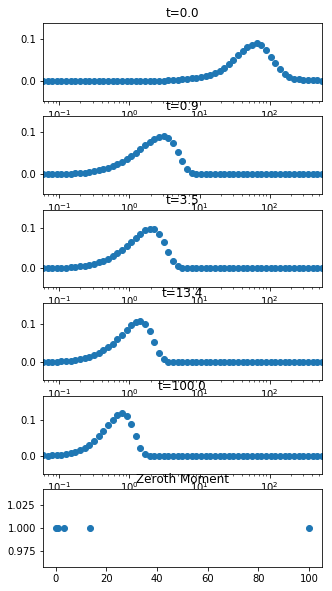

In [38]:
V = sol2.y[0:-1,:]
M = sol2.y[-1:,:]

rows = len(T)
plt.close('all')
fig, axes = plt.subplots(rows+1,1,figsize=(5,10))
for i in range(rows):
    axes[i].scatter(L,V[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([L[0],L[-1]])
    axes[i].title.set_text('t={0}'.format(T[i]))
axes[rows].scatter(T,M[0,:])
axes[rows].title.set_text('Zeroth Moment')

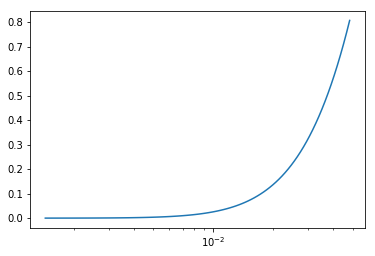

In [61]:
s = 0
e = 10
xx = np.logspace(np.log(L[s]),np.log(L[e]),100)
plt.plot(xx,lognorm_b(xx,L[e],lgv,sg))
plt.xscale('log')

In [277]:
M

array([[1.0000003 , 1.0000003 , 1.0000003 , 1.00000035, 1.00000027]])